In [1]:
import pandas as pd

sensus = {'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 170], 
          'jk': ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'],
          'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67]}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,jk,berat
0,158,pria,64
1,170,pria,86
2,183,pria,84
3,191,pria,80
4,155,wanita,49
5,163,wanita,59
6,180,wanita,67
7,158,wanita,54
8,170,wanita,67


In [2]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'jk']])
y_train = np.array(sensus_df['berat'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [170 'wanita']]

y_train: [64 86 84 80 49 59 67 54 67]


In [3]:
X_train_transposed = np.transpose(X_train)

print(f'X_train:\n{X_train}\n')
print(f'X_train_transposed:\n{X_train_transposed}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
jk_binarised = lb.fit_transform(X_train_transposed[1])

print(f'jk: {X_train_transposed[1]}\n')
print(f'jk_binarised:\n{jk_binarised}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [5]:
jk_binarised = jk_binarised.flatten()
jk_binarised

y_train: [0 0 0 0 1 1 1 1 1]


In [6]:
X_train_transposed[1] = jk_binarised
X_train = X_train_transposed.transpose()

print(f'X_train_transposed:\n{X_train_transposed}\n')
print(f'X_train:\n{X_train}')

KNeighborsClassifier(n_neighbors=3)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

K = 3
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)

array([[155,  70]])

In [8]:
X_new = np.array([[155, 1]])
X_new

array([1])

In [9]:
y_pred = model.predict(X_new)
y_pred

array(['wanita'], dtype='<U6')

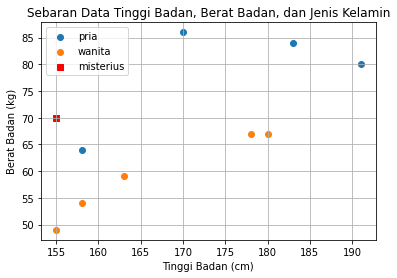

In [10]:
X_test = np.array([[168, 0], [180, 0], [160, 1], [169, 1]])
y_test = np.array([65, 96, 52, 67])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

In [11]:
y_pred = model.predict(X_test)
y_pred

array([155,  70])

In [12]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [13]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print(f'MAE: {MAE}')

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [14]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)

print(f'MSE: {MSE}')

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [15]:
from scipy.spatial.distance import euclidean

# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_new = np.array([[1640, 0]])

[euclidean(X_new[0], d) for d in X_train]

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


In [16]:
# tinggi dalam meter
X_train = np.array([[1.7, 0], [1.6, 1]])
X_new = np.array([[1.64, 0]])

[euclidean(X_new[0], d) for d in X_train]

array([1, 0, 1, 1])

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [17]:
# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_train_scaled = ss.fit_transform(X_train)
print(f'X_train_scaled:\n{X_train_scaled}\n')

X_new = np.array([[1640, 0]])
X_new_scaled = ss.transform(X_new)
print(f'X_new_scaled: {X_new_scaled}\n')

jarak = [euclidean(X_new_scaled[0], d) for d in X_train_scaled]
print(f'jarak: {jarak}')

Accuracy: 0.75


In [18]:
# tinggi dalam meter
X_train = np.array([[1.7, 0], [1.6, 1]])
X_train_scaled = ss.fit_transform(X_train)
print(f'X_train_scaled:\n{X_train_scaled}\n')

X_new = np.array([[1.64, 0]])
X_new_scaled = ss.transform(X_new)
print(f'X_new_scaled: {X_new_scaled}\n')

jarak = [euclidean(X_new_scaled[0], d) for d in X_train_scaled]
print(f'jarak: {jarak}')

Precission: 0.6666666666666666


In [19]:
# Training Set
X_train = np.array([[158, 0], [170, 0], [183, 0], [191, 0], [155, 1], [163, 1],
                    [180, 1], [158, 1], [170, 1]])

y_train = np.array([64, 86, 84, 80, 49, 59, 67, 54, 67])

# Test Set
X_test = np.array([[168, 0], [180, 0], [160, 1], [169, 1]])
y_test = np.array([65, 96, 52, 67])

Recall: 1.0


In [20]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

print(f'X_train_scaled:\n{X_train_scaled}\n')
print(f'X_test_scaled:\n{X_test_scaled}\n')

F1-score: 0.8


In [5]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')

NameError: name 'model' is not defined